Autores:

    - Pablo Simón Saiz
    - Alex Tomé Aguiar

# Flow Shop Permutacional

In [12]:
from utils import get_fichero, read_file, generar_permutador, funcion_f, tiempo_final_f
from searchs import local_search, rand_search, recocido_simulado
import pandas as pd
from genetico import genetic
import numpy as np

# Introducción de fichero
Aqui seleccionaremos el fichero que queramos leer, las opciones disponibles son las siguientes: (Dar valor de None para introducir por teclado).

    1. ejem_clase1
    2. ejem_clase2
    3. Doc1
    4. Doc2
    5. Doc3
    6. Doc4
    7. Doc5
    8. Doc6
    9. Doc7
    10. Doc8
    11. Doc9
    12. Doc10
    13. Doc11

In [14]:
NFILE = 5 # poner a None para pedir por teclado

file = get_fichero(NFILE)
print(file)

Data\Doc3.txt


# Lectura de fichero

In [15]:
d = read_file(file)
display(pd.DataFrame(d))

,0,1,2,3,4
0,456,537,123,214,234
1,789,854,225,528,123
2,876,632,588,896,456
3,543,145,669,325,789
4,210,785,966,147,876
5,123,214,332,856,543
6,456,752,144,321,210
7,789,143,755,427,123
8,876,698,322,546,456
9,543,532,100,321,789


# Generación del Permutador
Aqui se generará nuestro punto de partida.

In [16]:
v = generar_permutador(d)
print(v)

[9, 11, 4, 2, 5, 0, 1, 3, 10, 8, 7, 6]


# Funcion F

In [17]:
f = funcion_f(v, d)
display(pd.DataFrame(f))

,0,1,2,3,4
0,2332,3490,4116,5627,6190
1,3121,4344,4569,6155,6313
2,1753,2739,3661,4557,5013
3,3664,4489,5238,6480,7269
4,877,2107,3073,3220,4096
5,1876,2953,3993,5413,5956
6,5995,6747,6891,8175,8934
7,5539,5682,6525,7854,8724
8,4750,5448,5770,7427,8601
9,543,1075,1175,1496,2285


# Busquedas
## Búsqueda Aleatoria
Este tipo de búsqueda depende totalmente de la suerte, por lo que no explota ningún tipo de camino encontrado.

Permutador: [5, 11, 4, 3, 10, 0, 9, 6, 8, 2, 1, 7]
Puntuación: 7611


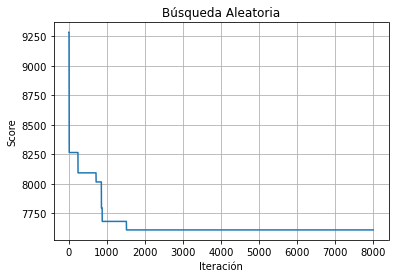

In [18]:
rs = rand_search(d, 8000)
rs_score = tiempo_final_f(funcion_f(rs, d))

print(f"Permutador: {rs}")
print(f"Puntuación: {rs_score}")

## Búsqueda Local
Este tipo de búsqueda, por otro lado, explota el camino encontrado, pero al caer en un máximo local no aseguramos que sea la mejor solución.
### Primero el mejor

Permutador: [11, 10, 5, 4, 2, 3, 8, 1, 9, 7, 6, 0]
Puntuación: 7399


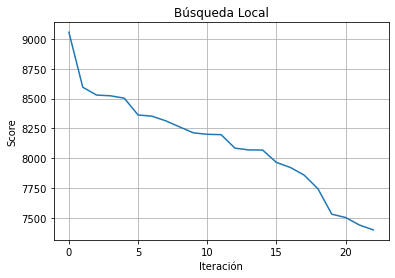

In [24]:
ls1 = local_search(d, True)
ls1_score = tiempo_final_f(funcion_f(ls1, d))

print(f"Permutador: {ls1}")
print(f"Puntuación: {ls1_score}")

## El mejor

Permutador: [11, 6, 10, 9, 3, 5, 4, 1, 2, 8, 0, 7]
Puntuación: 7611


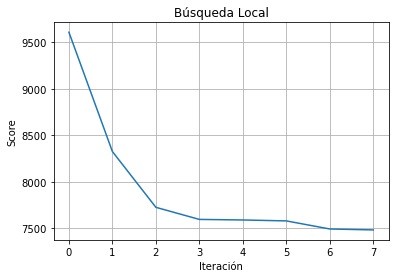

In [27]:
ls2 = local_search(d, False)
ls2_score = tiempo_final_f(funcion_f(rs, d))

print(f"Permutador: {ls2}")
print(f"Puntuación: {ls2_score}")

# Recocido

Permutador: [10, 5, 11, 4, 9, 8, 2, 1, 3, 6, 7, 0]
Puntuación: 7312


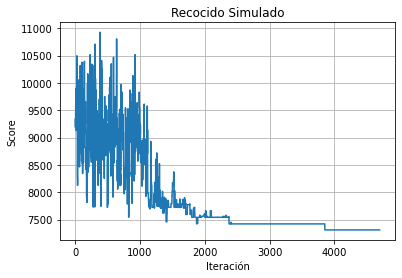

In [29]:
rec = recocido_simulado(d, 100)
rec_score = tiempo_final_f(funcion_f(rec, d))

print(f"Permutador: {rec}")
print(f"Puntuación: {rec_score}")

## Genético
Si jugamos bien con nuestros parámetros, explotaremos el camino encontrado mientras a su vez exploramos posibles alternativas

Permutador: [5, 3, 10, 4, 9, 2, 11, 1, 8, 6, 7, 0]
Puntuación: 7543


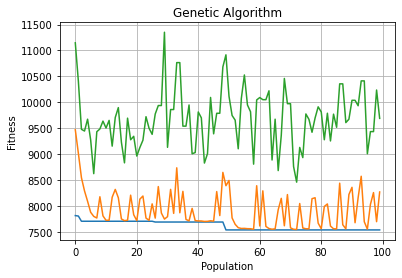

In [42]:
NIND = 100 # Número de individuos por población
NGEN = 100 # Número de generaciones por individuo
MUPB = 0.3 # Probabilidad de mutación
CXPB = 0.7 # Probabilidad de cruce

gen = genetic(d, NIND=NIND, NGEN=NGEN, MUPB=MUPB, CXPB=CXPB, OX=False, plot = True)
gen_score = tiempo_final_f(funcion_f(gen, d))

print(f"Permutador: {gen}")
print(f"Puntuación: {gen_score}")